## Donor Choose : Truncated SVD and XG Boost

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('cleandonor4.csv')

donor.head(2)
# We removed the redundant features that were taking up space and created a new .csv file

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,project_title
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,Educational Support for English Learners at Home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,Wanted: Projector for Hungry Learners


In [3]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )
    
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 50798.10it/s]


In [5]:
donor.shape

(109248, 11)

In [6]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle


In [7]:
donor = donor[0 : 50000]

In [8]:
Y = donor['project_is_approved']

len( Y )  # Y = label i.e; Project is approved ( 0 or 1 )

50000

In [9]:
donor.drop( 'project_is_approved', axis=1, inplace=True )

In [10]:
donor['combined'] = donor['cleanEssay'] + ' ' + donor['cleanTitle']

In [11]:
donor.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle,combined
0,Mrs.,IN,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,educational support english learners home,My students are English learners that are work...
1,Mr.,FL,7,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,wanted: projector hungry learners,Our students arrive to our school eager to lea...


### Computing Sentiment Scores

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

s = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
comp = []

for sentence in tqdm( donor['cleanEssay'].values ) :
    
    Sscore = s.polarity_scores( sentence )

    neg.append( Sscore['neg'] )
    pos.append( Sscore['pos'] )
    neu.append( Sscore['neu'] )
    comp.append( Sscore['compound'] )

D:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:17<00:00, 253.64it/s]


In [13]:
print( neg[0: 15] )
print( pos[0: 15] )
print( neu[0: 15] )
print( comp[0: 15] )

[0.008, 0.037, 0.058, 0.053, 0.016, 0.077, 0.028, 0.019, 0.007, 0.05, 0.068, 0.021, 0.005, 0.078, 0.023]
[0.08, 0.111, 0.183, 0.215, 0.087, 0.146, 0.172, 0.155, 0.249, 0.281, 0.177, 0.246, 0.228, 0.094, 0.142]
[0.912, 0.852, 0.759, 0.732, 0.897, 0.777, 0.8, 0.826, 0.744, 0.669, 0.755, 0.733, 0.767, 0.828, 0.835]
[0.9611, 0.9267, 0.9953, 0.9931, 0.9192, 0.9553, 0.9815, 0.9937, 0.9975, 0.9969, 0.9862, 0.9992, 0.9948, 0.4401, 0.972]


In [14]:
donor['neg'] = neg
donor['pos'] = pos
donor['neu'] = neu
donor['comp'] = comp

### Computing no. of words in Essay and Title

In [15]:
def totalWords( col ):
    
    words = []
    for sent in tqdm( donor[col].values ) :
        w = 0
        
        for word in sent.split():
            w += 1
    
        words.append(w)
    
    return words

In [16]:
titleWords = totalWords('cleanTitle')

print( titleWords[0:15] )
len( titleWords )

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 642740.20it/s]


[5, 4, 6, 2, 3, 7, 5, 2, 3, 3, 3, 5, 4, 3, 4]


50000

In [17]:
essayWords = totalWords('cleanEssay')

len( essayWords )

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 25722.79it/s]


50000

In [18]:
donor['totalWordsTitle'] = titleWords

donor['totalWordsEssay'] = essayWords

In [19]:
X = donor  # X = our features 

### Test Train Split

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [21]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 17)
(11055, 17)
(16500, 17)
(22445,)
(11055,)
(16500,)


In [22]:
print( xtrain['cleanEssay'][2] )

"True champions aren't always the ones that win, but those with the most guts." By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for the girls and boys soccer teams. The teams are made up of 7th and 8th grade students, and most of them have not had the opportunity to play in an organized sport due to family financial difficulties. I teach at a Title One middle school in an urban neighborhood. 74% of our students qualify for free and reduced lunch and many come from very activity/ sport opportunity-poor homes. My students love to participate in sports to learn new skills and be apart of team atmosphere. My school lacks the funding to meet my students’ needs and I am concerned that their lack of exposure will not prepare them for the participating in sports and teams in high school. By the end of the school year, the goal is to provide our students with an opportunity to learn a variety of soccer skills, and positive quali

In [23]:
xtrain['combined'][2]

'"True champions aren\'t always the ones that win, but those with the most guts." By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for the girls and boys soccer teams. The teams are made up of 7th and 8th grade students, and most of them have not had the opportunity to play in an organized sport due to family financial difficulties. I teach at a Title One middle school in an urban neighborhood. 74% of our students qualify for free and reduced lunch and many come from very activity/ sport opportunity-poor homes. My students love to participate in sports to learn new skills and be apart of team atmosphere. My school lacks the funding to meet my students’ needs and I am concerned that their lack of exposure will not prepare them for the participating in sports and teams in high school. By the end of the school year, the goal is to provide our students with an opportunity to learn a variety of soccer skills, and positive qua

### Selecting Top 2k features from Essay and Title Text

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer( min_df = 15 )

vect = tfidfvect.fit_transform( xtrain['combined'].values )

print( vect.shape )

(22445, 7558)


In [25]:
import numpy as np

ind = np.argsort( tfidfvect.idf_ )[ ::-1 ]

feat = tfidfvect.get_feature_names()

In [26]:
n = 2000

topFeat = [ feat[i] for i in ind[:n] ]
topIDF = [ tfidfvect.idf_[i] for i in ind[:n] ]

featIDF = list( zip(topFeat, topIDF) )

print( featIDF[:20] )

[('homemade', 8.24627898133642), ('theatrical', 8.24627898133642), ('corporation', 8.24627898133642), ('manipulates', 8.24627898133642), ('wedo', 8.24627898133642), ('correlated', 8.24627898133642), ('aligns', 8.24627898133642), ('familial', 8.24627898133642), ('stix', 8.24627898133642), ('rob', 8.24627898133642), ('margaret', 8.24627898133642), ('raining', 8.24627898133642), ('rods', 8.24627898133642), ('factory', 8.24627898133642), ('stigma', 8.24627898133642), ('ceases', 8.24627898133642), ('pile', 8.24627898133642), ('cores', 8.24627898133642), ('photosynthesis', 8.24627898133642), ('chants', 8.24627898133642)]


In [27]:
print( len(topFeat) )
print( topFeat[:20] )

2000
['homemade', 'theatrical', 'corporation', 'manipulates', 'wedo', 'correlated', 'aligns', 'familial', 'stix', 'rob', 'margaret', 'raining', 'rods', 'factory', 'stigma', 'ceases', 'pile', 'cores', 'photosynthesis', 'chants']


### Creating Co-Occurence matrix with these 2k features

In [28]:
def COmatrix( data, words, cw=5 ):
    
    cm = pd.DataFrame( np.zeros((len(words), len(words))), index=words, columns=words )
    
    for sent in data['combined']:
        
        word = sent.split()
        
        for ind in range( len(word) ):
            
            if cm.get( word[ind] ) is None:
                continue
                
            for i in range(1, cw + 1 ):
                
                if ind - i >= 0:
                    if cm.get( word[ind - i] ) is not None:
                        
                        cm[ word[ind-i]].loc[word[ind]] =  (cm.get( word[ind-i] ).loc[ word[ind] ] + 1) 
                        cm[word[ind]].loc[ word[ind-i] ] = (cm.get( word[ind] ).loc[ word[ind-i] ] + 1) 
                
                if ind + i < len(word):
                    if cm.get( word[ind+i] ) is not None:
                        
                        cm[ word[ind+i]].loc[word[ind]] =  (cm.get( word[ind+i] ).loc[ word[ind] ] + 1)                     
                        cm[word[ind]].loc[ word[ind+i] ] = (cm.get( word[ind] ).loc[ word[ind+i] ] + 1) 
                        
    
    np.fill_diagonal( cm.values, 0 )
    cm = cm.div(2)
    
    return cm

In [29]:
# Taking Sample Data, Just to check

import pandas as pd
import numpy as np

li = ['abc def ijk pqr', 'pqr klm opq', 'lmn pqr xyz abc def pqr abc']

df = pd.DataFrame()
df['combined'] = li
df.head()

,combined
0,abc def ijk pqr
1,pqr klm opq
2,lmn pqr xyz abc def pqr abc


In [30]:
tf = ['abc','pqr', 'def']
c = COmatrix( df, tf, 2 )
c

,abc,pqr,def
abc,0.0,3.0,3.0
pqr,3.0,0.0,2.0
def,3.0,2.0,0.0


In [31]:
cmtr = COmatrix( xtrain, topFeat )

In [32]:
cmtr.shape

(2000, 2000)

In [33]:
cmtr.head(3)

,homemade,theatrical,corporation,manipulates,wedo,correlated,aligns,familial,stix,rob,...,gallery,equation,composing,eraser,respecting,massive,impede,singers,errors,curiosities
homemade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
theatrical,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
corporation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
cmtr[ cmtr['homemade'] > 0.0 ]

,homemade,theatrical,corporation,manipulates,wedo,correlated,aligns,familial,stix,rob,...,gallery,equation,composing,eraser,respecting,massive,impede,singers,errors,curiosities
crate,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dishes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
delicious,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
milk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cmtr[ cmtr != 0 ].cumsum(axis=1).min(axis=1)[:10]

homemade       1.0
theatrical     NaN
corporation    NaN
manipulates    NaN
wedo           NaN
correlated     1.0
aligns         NaN
familial       NaN
stix           3.0
rob            NaN
dtype: float64

In [ ]:
co = pd.DataFrame(columns=['row', 'col','co-occurence'])

r = []
c = []
coo = []

count = 0

for i in tqdm(cmtr.index):
    for j in cmtr.index:
        
        if cmtr.loc[j][i] != 0:
    
            r.append(j) 
            c.append(i) 
            coo.append( cmtr.loc[j][i] )
            
            count += 1
            
        if count == 10:
            break

co['row'] = r
co['col'] = c
co['co-occurence'] = coo


In [38]:
co.head()

,row,col,co-occurence
0,sophomores,solace,2.0
1,refuge,solace,2.0
2,repetitive,motions,2.0
3,bulbs,motions,2.0
4,facial,motions,2.0


### TruncatedSVD on calculated Co-Occurence matrix

In [39]:
from sklearn.decomposition import TruncatedSVD

# Dim-reduction using Truncated SVD, and getting the Top Singular Values explaining the most variance

svd = TruncatedSVD( n_components = 1999, random_state=42 )

trsvd = svd.fit_transform( cmtr )

cumVarianceExplained = np.cumsum( svd.explained_variance_ratio_ )

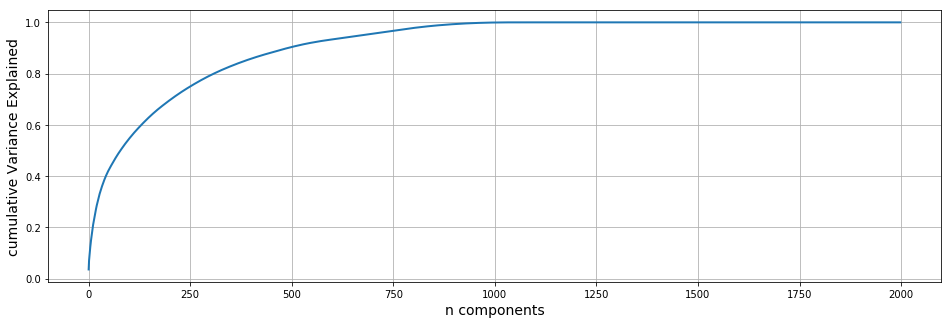

In [40]:
# Plot the Truncated SVD spectrum

import matplotlib.pyplot as plt

plt.figure( figsize=(16, 5))

plt.plot( cumVarianceExplained, linewidth = 2 )
plt.grid()
plt.xlabel('n components',size=14)
plt.ylabel('cumulative Variance Explained',size=14)
plt.show()

In [41]:
n =  500
svd = TruncatedSVD( n_components = n )

svd.fit( cmtr )

trSVD = svd.transform( cmtr )

print( trSVD.shape )

(2000, 500)


In [43]:
trSVD[0][:20]

array([ 1.60696828e-05,  7.42830799e-06, -1.07995806e-12,  2.73240164e-12,
        1.14025997e-07, -9.20858801e-08,  1.17769478e-03,  6.52552778e-04,
       -3.19409357e-04, -1.29377594e-04,  1.71005947e-02, -1.65932976e-02,
        9.06602151e-08,  4.05160977e-03,  1.04150819e-04, -6.05101517e-04,
        2.18714068e-04,  1.70564422e-11,  3.06435244e-10,  4.22552499e-10])

In [44]:
print( topFeat[:20] )

['homemade', 'theatrical', 'corporation', 'manipulates', 'wedo', 'correlated', 'aligns', 'familial', 'stix', 'rob', 'margaret', 'raining', 'rods', 'factory', 'stigma', 'ceases', 'pile', 'cores', 'photosynthesis', 'chants']


In [45]:
df = pd.DataFrame( trSVD, index = cmtr.index)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
homemade,0.000016,0.000007,-1.079958e-12,2.732402e-12,1.140260e-07,-9.208588e-08,0.001178,0.000653,-0.000319,-0.000129,...,-0.00866,0.041073,-0.007997,0.004814,-0.023168,0.022285,-0.047526,-0.017224,-0.031348,-0.025551
theatrical,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
corporation,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
manipulates,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wedo,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Creating a dictionary with word as key and vector as value

In [46]:
ind = list(cmtr.index)
print(len(ind))
print(ind[:20])

2000
['homemade', 'theatrical', 'corporation', 'manipulates', 'wedo', 'correlated', 'aligns', 'familial', 'stix', 'rob', 'margaret', 'raining', 'rods', 'factory', 'stigma', 'ceases', 'pile', 'cores', 'photosynthesis', 'chants']


In [47]:
vecDict = dict()
c = 0

for i in trSVD:
    
    vecDict[ ind[c] ] = i
    c += 1

In [49]:
vecDict['homemade'][:20]

array([ 1.60696828e-05,  7.42830799e-06, -1.07995806e-12,  2.73240164e-12,
        1.14025997e-07, -9.20858801e-08,  1.17769478e-03,  6.52552778e-04,
       -3.19409357e-04, -1.29377594e-04,  1.71005947e-02, -1.65932976e-02,
        9.06602151e-08,  4.05160977e-03,  1.04150819e-04, -6.05101517e-04,
        2.18714068e-04,  1.70564422e-11,  3.06435244e-10,  4.22552499e-10])

In [117]:
x = vecDict['homemade']
x.shape

(500,)

In [110]:
svdFeat = topFeat[:500]

## Vectorizing Textual Data

In [113]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [119]:
import numpy as np


def avgw2v( data, words ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(500)
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = vecDict[ w ]  # Computing it's vector
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [114]:
# For Train

trfinal = stow( xtrain['combined'] ) 

print( len( trfinal ) )

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:04<00:00, 4986.15it/s]


22445


In [120]:
xtrAW2V = np.asarray( avgw2v( trfinal, svdFeat ) )

xtrAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [00:48<00:00, 464.15it/s]


(22445, 500)

In [121]:
# For CV

cvfinal = stow( xcv['combined'] ) 

print( len( cvfinal ) )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 7060.23it/s]


11055


In [122]:
xcvAW2V = np.asarray( avgw2v( cvfinal, svdFeat ) )

xcvAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:16<00:00, 669.10it/s]


(11055, 500)

In [123]:
# For Test

tefinal = stow( xtest['combined'] ) 

print( len( tefinal ) )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:02<00:00, 5536.85it/s]


16500


In [124]:
xteAW2V = np.asarray( avgw2v( tefinal, svdFeat ) )

xteAW2V.shape

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:24<00:00, 660.07it/s]


(16500, 500)

### school state

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit( xtrain['school_state'].values )

xtrState = vectorizer.transform( xtrain['school_state'].values )
xcvState = vectorizer.transform( xcv['school_state'].values )
xteState = vectorizer.transform( xtest['school_state'].values )

print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


### teacher prefix

In [126]:
vectorizer = CountVectorizer(vocabulary = ['dr', 'mr', 'mrs', 'ms', 'teacher'])

vectorizer.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectorizer.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectorizer.transform( xcv['teacher_prefix'].values )
xtePrefix = vectorizer.transform( xtest['teacher_prefix'].values )

print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 5)
(11055, 5)
(16500, 5)


###  categories

In [127]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_categories'].values )

xtrCat = vectorizer.transform( xtrain['clean_categories'].values )
xcvCat = vectorizer.transform( xcv['clean_categories'].values )
xteCat = vectorizer.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


###  subcategory

In [128]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectorizer.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectorizer.transform( xcv['clean_subcategory'].values )
xteSubCat = vectorizer.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


### ProjectGradeCategory

In [129]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### price

In [130]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### previously posted projects

In [131]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### quantity

In [132]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrQuan.shape )
print( xcvQuan.shape )
print( xteQuan.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Sentiment Score : Negative

In [133]:
trneg = xtrain['neg'].values.reshape(-1,1)
cvneg = xcv['neg'].values.reshape(-1,1)
teneg = xtest['neg'].values.reshape(-1,1)

print(trneg.shape)
print(cvneg.shape)
print(teneg.shape)

(22445, 1)
(11055, 1)
(16500, 1)


### Sentiment Score : Positive

In [134]:
trpos = xtrain['pos'].values.reshape(-1,1)
cvpos = xcv['pos'].values.reshape(-1,1)
tepos = xtest['pos'].values.reshape(-1,1)

print(trpos.shape)
print(cvpos.shape)
print(tepos.shape)

(22445, 1)
(11055, 1)
(16500, 1)


### Sentiment Score : Neutral

In [135]:
trneu = xtrain['neu'].values.reshape(-1,1)
cvneu = xcv['neu'].values.reshape(-1,1)
teneu = xtest['neu'].values.reshape(-1,1)

print(trneu.shape)
print(cvneu.shape)
print(teneu.shape)

(22445, 1)
(11055, 1)
(16500, 1)


### Sentiment Score : Compound

In [136]:
trcomp = xtrain['comp'].values.reshape(-1,1)
cvcomp = xcv['comp'].values.reshape(-1,1)
tecomp = xtest['comp'].values.reshape(-1,1)

print(trcomp.shape)
print(cvcomp.shape)
print(tecomp.shape)

(22445, 1)
(11055, 1)
(16500, 1)


### totalWordsTitle

In [137]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsTitle'].values.reshape(-1,1) )

xtrTWT = norm.transform( xtrain['totalWordsTitle'].values.reshape(-1,1) )
xcvTWT = norm.transform( xcv['totalWordsTitle'].values.reshape(-1,1) )
xteTWT = norm.transform( xtest['totalWordsTitle'].values.reshape(-1,1) )

print( xtrTWT.shape )
print( xcvTWT.shape )
print( xteTWT.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### totalWordsEssay

In [139]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['totalWordsEssay'].values.reshape(-1,1) )

xtrTWE = norm.transform( xtrain['totalWordsEssay'].values.reshape(-1,1) )
xcvTWE = norm.transform( xcv['totalWordsEssay'].values.reshape(-1,1) )
xteTWE = norm.transform( xtest['totalWordsEssay'].values.reshape(-1,1) )

print( xtrTWE.shape )
print( xcvTWE.shape )
print( xteTWE.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Creating a Data Matrix

In [140]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrTWE, xtrTWT, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrQuan, xtrPrev, \
                         trneg, trpos, trneu, trcomp, xtrAW2V )).tocsr()

xcv1 = hstack(( xcvTWE, xcvTWT, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvQuan, xcvPrev, \
                         cvneg, cvpos, cvneu, cvcomp, xcvAW2V )).tocsr()


xte1 = hstack(( xteTWE, xteTWT, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xteQuan, xtePrev, \
                         teneg, tepos, teneu, tecomp, xteAW2V )).tocsr()

In [141]:
print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 625) (22445,)
(11055, 625) (11055,)
(16500, 625) (16500,)


In [143]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter( x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout( title="hello world" )
})

# Ref : https://plot.ly/python/

### Functions for Hyperparameter Tuning and computing roc_auc scores

In [144]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

import seaborn as sn

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [144]:
def Predict( data, classifier ): # Predicts the probability of data points all at once
    
    yPred = []
        
    yPred.extend( classifier.predict_proba( data )[:, 1] ) # [ :, 1] : All row Only 1 col
    # predict_proba : Return probability estimates for the test data X.
    
    return yPred

In [145]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [151]:
import xgboost as xgb

def BestGB( xtr, xcv, ytr, ycv ):
    
    trAUC = []
    cvAUC = []
    
    depth = [ 5, 11, 51, 101 ]
    rate = [ 0.01, 0.1 , 1  ]
    d = []
    r = []
    print(' '*12,'- First -', ' '*16,'- Second -', ' '*17,'- Third -', ' '*16,'- Fourth -')
    print('      ', end =' ')

    for i in depth:
        for j in rate:
            
            clf = xgb.XGBClassifier( objective = "binary:logistic", random_state = 42, max_depth = i, eta = j, class_weight='balanced' )
            clf.fit( xtr, ytr )
            
            ytrPred = batchPredict( xtr, clf )    
            ycvPred = batchPredict( xcv, clf )

            # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
            # not the predicted outputs 

            trAUC.append( roc_auc_score( ytr, ytrPred ))
            cvAUC.append( roc_auc_score( ycv, ycvPred ))
            
            d.append(i)
            r.append(j)
        print('#'*20, end ='        ')
    
    #d = [  5,    5,  5    11,   11,  11    51,   51,  51    101,  101,  101 ]
    #r = [ 0.01, 0.1, 1   0.01, 0.1,  1     0.01, 0.1,  1     0.01, 0.1,  1  ]

    trace1 = go.Scatter3d( x = d, y = r , z = trAUC, name = 'Train')
    trace2 = go.Scatter3d( x = d, y = r, z = cvAUC, name = 'Cross validation')

    data = [trace1, trace2]

    layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='learning_rate'),
        zaxis = dict(title='AUC'),))

    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')

In [147]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low
    # argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [148]:
def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure(figsize = (8,6))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(cmtr, fmt=".1f", annot=True, annot_kws={"size": 18}, cmap='Blues_r')# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test ", sno)
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure(figsize = (8,6))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(cmte, fmt=".1f", annot=True, annot_kws={"size": 18}, cmap='Blues_r')# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()

In [149]:
def rocGB( xtr, xte, ytr, yte, D, N, sno ):
    
    clf = xgb.XGBClassifier( objective = "binary:logistic", random_state=42, max_depth = D, eta = N, class_weight='balanced' )
    clf.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, clf )    
    yTestPred = batchPredict( xte, clf )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve( yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel(" Hyperparameter ")
    plt.ylabel(" AUC ")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )
    


### XG Boost on the Data Matrix

In [152]:
BestGB( xtr1, xcv1, ytrain, ycv )

             - First -                  - Second -                   - Third -                  - Fourth -
       ####################        ####################        ####################        ####################        

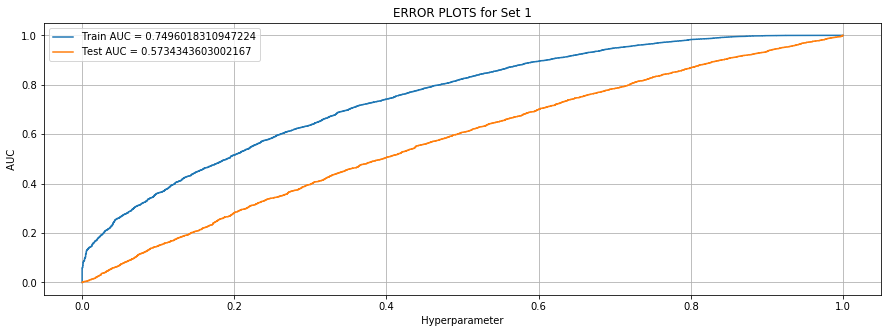

Confusion Matrix for Train of Set  1
 The maximum value of tpr*(1-fpr) =  0.4568430909803361  for threshold =  0.842
[[ 2423  1040]
 [ 6901 12081]]


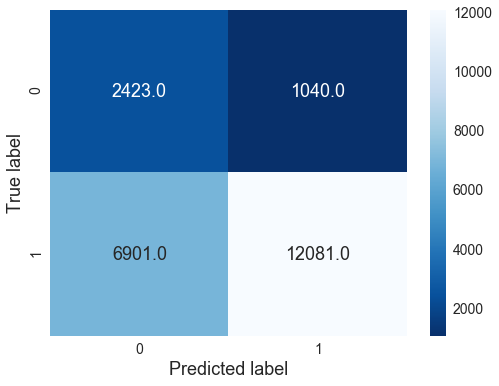



Confusion Matrix for Test  1
 The maximum value of tpr*(1-fpr) =  0.30991868017470936  for threshold =  0.852
[[1490 1056]
 [6722 7232]]


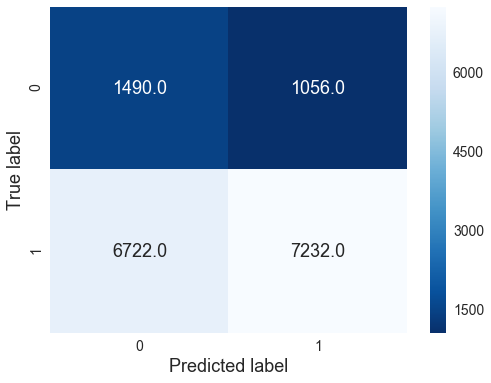

In [153]:
bestD = 5
bestN = 0.01

#sn.set_style('whitegrid')

rocGB( xtr1, xte1, ytrain, ytest, bestD, bestN, 1 )

## Conclusions

In [154]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " Best Depth ", " Best Learning rate "," Train AUC ", " Test AUC "]

x.add_row( [ " WW2V (Co Occurence) ", " 5 ", " 0.01 ", " 0.7496 ", " 0.5764 " ] ) 

print( x )

# Ref : http://zetcode.com/python/prettytable/

+-----------------------+--------------+----------------------+-------------+------------+
|       Vectorizer      |  Best Depth  |  Best Learning rate  |  Train AUC  |  Test AUC  |
+-----------------------+--------------+----------------------+-------------+------------+
|  WW2V (Co Occurence)  |      5       |         0.01         |    0.7496   |   0.5764   |
+-----------------------+--------------+----------------------+-------------+------------+
